In [ ]:
import os
data_dir= r'C:\Users\Benyamin\Downloads\DATASET\lego-brick-images\LEGO brick images v1' 

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
from matplotlib.image import imread

In [4]:
test_path=data_dir+'\\test\\'

In [5]:
train_path=data_dir+'\\train\\'

In [6]:
os.listdir(train_path)


['11214 Bush 3M friction with Cross axle',
 '18651 Cross Axle 2M with Snap friction',
 '2357 Brick corner 1x2x2',
 '3003 Brick 2x2',
 '3004 Brick 1x2',
 '3005 Brick 1x1',
 '3022 Plate 2x2',
 '3023 Plate 1x2',
 '3024 Plate 1x1',
 '3040 Roof Tile 1x2x45deg',
 '3069 Flat Tile 1x2',
 '32123 half Bush',
 '3673 Peg 2M',
 '3713 Bush for Cross Axle',
 '3794 Plate 1X2 with 1 Knob',
 '6632 Technic Lever 3M']

In [7]:
os.listdir(train_path+'11214 Bush 3M friction with Cross axle')
len(os.listdir(train_path+'11214 Bush 3M friction with Cross axle'))

320

In [8]:
os.listdir(train_path+'11214 Bush 3M friction with Cross axle')[0]

'201706171006-0002.png'

In [9]:
Example_one_image=train_path+'11214 Bush 3M friction with Cross axle'+'\\201706171006-0002.png' 

In [10]:
imread(Example_one_image)

array([[[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        ...,
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]],

       [[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        ...,
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]],

       [[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        ...,
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]],

       ...,

       [[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        ...,
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]],

       [[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        ...,
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]],

       [[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        ...,
        [0., 0., 0., 0.],
        [0., 0.

In [11]:
imread(Example_one_image).shape

(200, 200, 4)

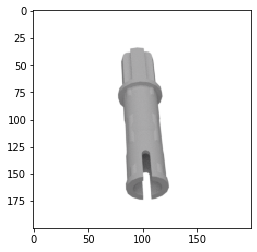

In [12]:
plt.imshow(imread(Example_one_image))

In [1]:
dim1 = []
dim2 = []
for image_filename in os.listdir(test_path+'\\3003 Brick 2x2'):         
    img = imread(test_path+'\\3003 Brick 2x2'+'\\'+image_filename)    
    d1,d2,colors = img.shape            
    dim1.append(d1)              
    dim2.append(d2)              
print(dim1)
print(dim2)

NameError: name 'os' is not defined

In [14]:
image_shape= (200,200,3)

In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [16]:
image_gen = ImageDataGenerator(rescale=1/255,rotation_range=90,width_shift_range=0.05,height_shift_range=0.05,shear_range=0.1,zoom_range=0.1,horizontal_flip=True,fill_mode='nearest') 


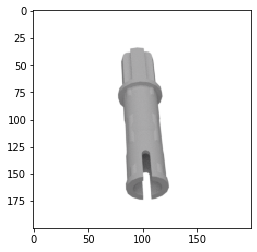

In [17]:
plt.imshow(imread(Example_one_image))

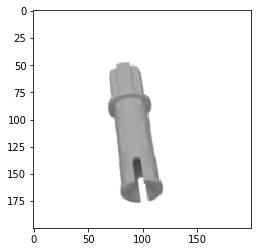

In [18]:
plt.imshow(image_gen.random_transform(imread(Example_one_image))) 

In [19]:
image_gen.flow_from_directory(train_path)
image_gen.flow_from_directory(test_path)

Found 5120 images belonging to 16 classes.
Found 1280 images belonging to 16 classes.


In [20]:
train_image_gen = image_gen.flow_from_directory(train_path,target_size=(200,200),color_mode='rgb',batch_size=16,class_mode='categorical')         



Found 5120 images belonging to 16 classes.


In [21]:
test_image_gen = image_gen.flow_from_directory(test_path,
                                               target_size=(200,200),
                                               color_mode='rgb',
                                               batch_size=16,
                                               class_mode='categorical',
                                               shuffle=False)

Found 1280 images belonging to 16 classes.


In [22]:
train_image_gen.class_indices 

{'11214 Bush 3M friction with Cross axle': 0,
 '18651 Cross Axle 2M with Snap friction': 1,
 '2357 Brick corner 1x2x2': 2,
 '3003 Brick 2x2': 3,
 '3004 Brick 1x2': 4,
 '3005 Brick 1x1': 5,
 '3022 Plate 2x2': 6,
 '3023 Plate 1x2': 7,
 '3024 Plate 1x1': 8,
 '3040 Roof Tile 1x2x45deg': 9,
 '3069 Flat Tile 1x2': 10,
 '32123 half Bush': 11,
 '3673 Peg 2M': 12,
 '3713 Bush for Cross Axle': 13,
 '3794 Plate 1X2 with 1 Knob': 14,
 '6632 Technic Lever 3M': 15}

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D

In [24]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(4,4),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(4,4),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(256))   
model.add(Activation('relu'))
model.add(Dropout(0.5))


model.add(Dense(16))
model.add(Activation('softmax'))      


model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 197, 197, 32)      1568      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 98, 98, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 95, 95, 64)        32832     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 47, 47, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 44, 44, 64)        65600     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 22, 22, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 30976)             0

In [25]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',patience=5)

In [26]:
model.fit_generator(train_image_gen,epochs=25, validation_data=test_image_gen, callbacks=[early_stop])

Epoch 1/25
320/320 [==============================] - 745s 2s/step - loss: 1.6828 - accuracy: 0.4184 - val_loss: 1.3270 - val_accuracy: 0.5320
Epoch 2/25
320/320 [==============================] - 713s 2s/step - loss: 1.3030 - accuracy: 0.5170 - val_loss: 1.0833 - val_accuracy: 0.5984
Epoch 3/25
320/320 [==============================] - 706s 2s/step - loss: 1.2007 - accuracy: 0.5537 - val_loss: 0.9747 - val_accuracy: 0.6508
Epoch 4/25
320/320 [==============================] - 706s 2s/step - loss: 1.1114 - accuracy: 0.5848 - val_loss: 0.9260 - val_accuracy: 0.6500
Epoch 5/25
320/320 [==============================] - 695s 2s/step - loss: 1.0483 - accuracy: 0.6049 - val_loss: 0.8802 - val_accuracy: 0.6625
Epoch 6/25
320/320 [==============================] - 764s 2s/step - loss: 0.9837 - accuracy: 0.6281 - val_loss: 0.8127 - val_accuracy: 0.7109
Epoch 7/25
320/320 [==============================] - 952s 3s/step - loss: 0.9329 - accuracy: 0.6459 - val_loss: 0.7583 - val_accuracy: 0.7188

In [27]:
model.metrics_names
model.evaluate_generator(test_image_gen) 

[0.40067610185597, 0.8335937]

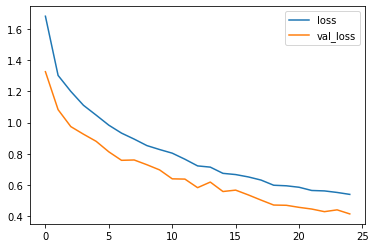

In [28]:
losses = pd.DataFrame(model.history.history)
losses[['loss','val_loss']].plot() 

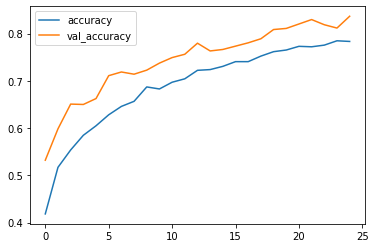

In [29]:
losses[['accuracy','val_accuracy']].plot()

from tensorflow.keras.models import load_model 
model.save('CNN-1.h5')

model=load_model('CNN-1.h5')

In [31]:
pred_probabilities = model.predict_generator(test_image_gen) 
pred_probabilities 

array([[5.8800769e-01, 4.0635377e-01, 2.7670087e-08, ..., 7.3178161e-09,
        1.4403446e-06, 5.4264348e-03],
       [9.4225937e-01, 5.7628088e-02, 1.9952930e-14, ..., 1.9364532e-12,
        3.3026318e-11, 6.7027569e-05],
       [5.5675793e-01, 4.4313407e-01, 3.8688147e-13, ..., 1.4569231e-09,
        5.1523874e-10, 1.0356332e-04],
       ...,
       [3.1441532e-02, 4.7671381e-02, 7.6433597e-04, ..., 3.3730128e-09,
        7.3041266e-04, 9.0132499e-01],
       [2.1347038e-03, 2.8568725e-04, 9.6425600e-04, ..., 3.3853451e-13,
        3.1298154e-04, 9.5694888e-01],
       [2.7534425e-02, 3.5875589e-03, 2.8065918e-04, ..., 1.9865321e-14,
        1.1283947e-08, 9.6843499e-01]], dtype=float32)

In [32]:
import sys
import numpy
numpy.set_printoptions(threshold=sys.maxsize)

predictions = pred_probabilities > 0.5
predictions

array([[ True, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False],
       [ True, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False],
       [ True, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False],
       [ True, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False],
       [ True, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False],
       [ True, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False],
       [ True, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False],
       [ True, False, False, False, False, False, False, False, False,
        False, False, Fals

In [41]:
from tensorflow.keras.preprocessing import image 
my_image = image.load_img(test_path+'3003 Brick 2x2'+'\\0082.png' ,target_size=(200,200,1)) 
my_image = image.img_to_array(my_image)

In [42]:
type(my_image)
my_image.shape
#my_image=my_image[:,:,0]

(200, 200, 3)

In [43]:
model.predict(my_image.reshape(1,200,200,3)) 

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]],
      dtype=float32)

In [ ]:
predict=np.argmax(model.predict(my_image.reshape(1,200,200,3)) , axis=1)
predict

In [40]:
train_image_gen.class_indices

{'11214 Bush 3M friction with Cross axle': 0,
 '18651 Cross Axle 2M with Snap friction': 1,
 '2357 Brick corner 1x2x2': 2,
 '3003 Brick 2x2': 3,
 '3004 Brick 1x2': 4,
 '3005 Brick 1x1': 5,
 '3022 Plate 2x2': 6,
 '3023 Plate 1x2': 7,
 '3024 Plate 1x1': 8,
 '3040 Roof Tile 1x2x45deg': 9,
 '3069 Flat Tile 1x2': 10,
 '32123 half Bush': 11,
 '3673 Peg 2M': 12,
 '3713 Bush for Cross Axle': 13,
 '3794 Plate 1X2 with 1 Knob': 14,
 '6632 Technic Lever 3M': 15}